In [62]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
 
# Commonly used modules
import numpy as np
import os
import sys
 
# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib
 
print(tf.__version__)

2.5.0


we are using inbuilt datatset in keras named boston housing, it contains various parameters in training data and the prices as labels


https://www.kaggle.com/prasadperera/the-boston-housing-dataset check out the datset here

In [63]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std =  np.std(train_features)                            # get np. std(standardad deviation of input features)
train_features =  (train_features - train_mean)/train_std               #subtract mean and divide by standard deviation to normalise

In [64]:
print(train_features)

[[-0.01740153 -0.07950719 -0.02053044 ...  0.01748027  0.29168408
   0.04140939]
 [-0.02578635  0.49185431 -0.06284582 ... -0.02615097  0.28115717
  -0.06669913]
 [ 0.00798597 -0.07950719  0.04844847 ...  0.01193979  0.14361488
  -0.06566029]
 ...
 [-0.02569707  0.1628886  -0.03493568 ... -0.01091467  0.05171224
  -0.03401032]
 [-0.01105277 -0.07950719  0.05869835 ... -0.02615097 -0.64292483
   0.0211174 ]
 [-0.02583746  0.33602845 -0.05661279 ... -0.01991794  0.15178708
  -0.05790362]]


# Building the model

Build the model
Building the neural network requires configuring the layers of the model, then compiling the model. First we stack a few layers together using keras.Sequential. Next we configure the loss function, optimizer, and metrics to monitor. These are added during the model's compile step:

Loss function - measures how accurate the model is during training, we want to minimize this with the optimizer.

Optimizer - how the model is updated based on the data it sees and its loss function.

Metrics - used to monitor the training and testing steps.

Let's build a network with 1 hidden layer of 20 neurons, and use mean squared error (MSE) as the loss function (most common one for regression problems):

use activation function [relu](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) as activation = tf.nn.relu

input shape will be equal to number of columns in train_features

 use optimizer as  [adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

 use loss as mse (mean squared error)

In [75]:
def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu , input_shape= np.shape(train_features[1])),
        Dense(1)
    ])

    #print(np.shape(train_features))

    model.compile(optimizer='adam',            
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

# Training
 
A very important part of training is when to [stop](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/) here we are monitoring val_loss and stopping if the for 50 iterations accuracy doesnt improve
 
set monitor to val_loss and set patience to 50
 
in model.fit use training features and labels
 
train till 1000 epochs
 
use validation split of 0.1

In [76]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
 
model = build_model()      #call the build_model function
 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50) 
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split =0.1 ,
                    callbacks=[early_stop, PrintDot()])
 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
 
# show RMSE
rmse_final = np.sqrt(float(hist['val_mae'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
..........................
Final Root Mean Square Error on validation set: 1.722


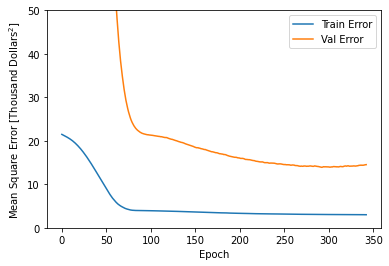

In [73]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['val_mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

Finally testing on the test dataset

In [74]:
#see how we've normalised the test features using training mean and std and not
#testing mean and std

test_features_norm = (test_features - train_mean) / train_std


mse, loss, mae = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 5ms/step - loss: 35.0394 - mae: 4.1999 - mse: 35.0394
Root Mean Square Error on test set: 5.919
